<a href="https://colab.research.google.com/github/Shrenik811rp/Chest-xray-project/blob/master/Chest_xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CNN**

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # import cv2
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zip_path = "/content/drive/MyDrive/xray_dataset/archive.zip"

!cp "{zip_path}" .

!unzip -q archive.zip

!rm archive.zip

In [50]:
dataset_folder = os.listdir("/content/chest_xray")

print(dataset_folder)
#print(np.__version__)


['val', 'chest_xray', 'train', 'test', '__MACOSX']


In [51]:
'''
Folder paths
'''
train_folder = "/content/chest_xray/train"

test_folder = "/content/chest_xray/test"

validation_folder ="/content/chest_xray/val"



In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random


In [53]:

'''
Test,Train,Val have these folders
'''
labels = ["NORMAL","PNEUMONIA"]

img_size = 50

def getData(dir):
    data = []

    for label in labels:

        path = os.path.join(dir,label)
        class_num = labels.index(label)

        for img in os.listdir(path):

            try:
                img_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)

                new_arr = cv2.resize(img_arr,(img_size,img_size))

                data.append([new_arr,class_num])
            
            except Exception as error:
                print(error)
    
    return np.array(data,dtype=object)


train = getData(train_folder)

test = getData(test_folder)

val = getData(validation_folder)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


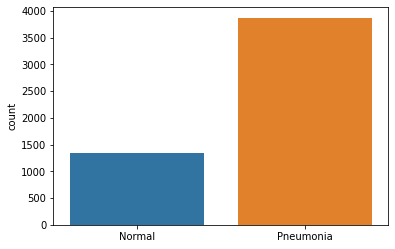

In [54]:
list_data = []
for i in train:
    if(i[1] == 0):
        list_data.append("Normal")
    else:
        list_data.append("Pneumonia")
        
sns.countplot(list_data)

In [55]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)

In [56]:
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255

In [57]:


X_train = X_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)



In [58]:


import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential


from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


In [59]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation="relu"))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), shuffle=True)
scores = model.evaluate(X_test, y_test)

model.summary()
model.save("cnn.model")

Epoch 1/20
163/163 [==============================] - 30s 182ms/step - loss: 0.3115 - accuracy: 0.8691 - val_loss: 1.5058 - val_accuracy: 0.6250
Epoch 2/20
163/163 [==============================] - 30s 185ms/step - loss: 0.1454 - accuracy: 0.9423 - val_loss: 0.8542 - val_accuracy: 0.5625
Epoch 3/20
163/163 [==============================] - 30s 182ms/step - loss: 0.1123 - accuracy: 0.9572 - val_loss: 0.3702 - val_accuracy: 0.7500
Epoch 4/20
163/163 [==============================] - 30s 183ms/step - loss: 0.0981 - accuracy: 0.9651 - val_loss: 0.9132 - val_accuracy: 0.6250
Epoch 5/20
163/163 [==============================] - 30s 183ms/step - loss: 0.0866 - accuracy: 0.9684 - val_loss: 0.5315 - val_accuracy: 0.6875
Epoch 6/20
163/163 [==============================] - 30s 184ms/step - loss: 0.0844 - accuracy: 0.9668 - val_loss: 0.3195 - val_accuracy: 0.7500
Epoch 7/20
163/163 [==============================] - 29s 180ms/step - loss: 0.0758 - accuracy: 0.9720 - val_loss: 1.4252 - val_ac

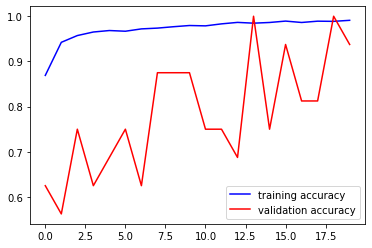

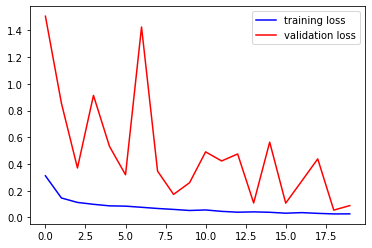

In [61]:
# visualization

import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="training accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="training loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [62]:
def show_confusion_matrix(model,x,y):
  disp = plot_confusion_matrix(model, x, y,
                               cmap=plt.cm.Blues,
                               normalize= None, values_format = '.2f')
  plt.show()

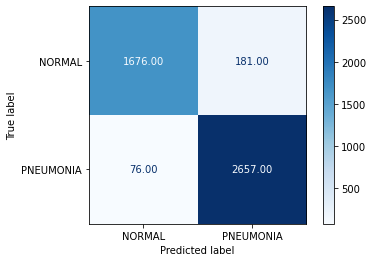

In [99]:
show_confusion_matrix(model,X_test,y_test)

In [100]:
predictions = model.predict(X_test)
acc = metrics.accuracy_score(y_test, predictions)
accuracy_values.append(acc)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      NORMAL       0.96      0.90      0.93      1857
   PNEUMONIA       0.94      0.97      0.95      2733

    accuracy                           0.94      4590
   macro avg       0.95      0.94      0.94      4590
weighted avg       0.94      0.94      0.94      4590



In [65]:
labels = ["NORMAL", "PNEUMONIA"]
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (img_size,img_size))
    return new_array.reshape(-1,img_size,img_size, 1)

model = tf.keras.models.load_model("cnn.model") # load model

In [66]:
# extra pneumonia photo from google
prediction = model.predict([prepare("/content/chest_xray/train/NORMAL/IM-0115-0001.jpeg")])
print(labels[int(prediction[0])])

NORMAL


#**SVM**

In [67]:
'''
Folder paths
'''
train_folder = "/content/chest_xray/train"

test_folder = "/content/chest_xray/test"

validation_folder ="/content/chest_xray/val"

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random


In [69]:

'''
Test,Train,Val have these folders
'''
labels = ["NORMAL","PNEUMONIA"]

img_size = 50

def getData(dir):
    data = []

    for label in labels:

        path = os.path.join(dir,label)
        class_num = labels.index(label)

        for img in os.listdir(path):

            try:
                img_arr = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)

                new_arr = cv2.resize(img_arr,(img_size,img_size))

                data.append([new_arr,class_num])
            
            except Exception as error:
                print(error)
    
    return np.array(data,dtype=object)


train = getData(train_folder)

test = getData(test_folder)

val = getData(validation_folder)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


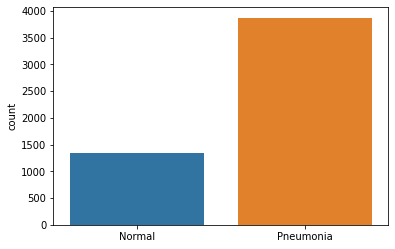

In [70]:
list_data = []
for i in train:
    if(i[1] == 0):
        list_data.append("Normal")
    else:
        list_data.append("Pneumonia")
        
sns.countplot(list_data)

In [71]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    X_val.append(feature)
    y_val.append(label)

In [72]:
X_train = np.array(X_train) / 255
X_val = np.array(X_val) / 255
X_test = np.array(X_test) / 255

In [73]:


X_train = X_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

X_val = X_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

X_test = X_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [74]:


import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential


from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


from tensorflow.keras.regularizers import l2

In [75]:
svm_model = Sequential()

svm_model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:]))
svm_model.add(Activation("relu"))
svm_model.add(MaxPooling2D(2, 2))
svm_model.add(Dropout(0.2))

svm_model.add(Conv2D(64, (3, 3), padding="same"))
svm_model.add(Activation("relu"))
svm_model.add(MaxPooling2D(2, 2))
svm_model.add(Dropout(0.2))

svm_model.add(Conv2D(128, (3, 3), padding="same"))
svm_model.add(Activation("relu"))
svm_model.add(MaxPooling2D(2, 2))
svm_model.add(Dropout(0.2))

svm_model.add(Flatten())
svm_model.add(Dense(128, activation="relu"))

# model.add(Dense(1))
# model.add(Activation("sigmoid"))
svm_model.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.001),
                activation='linear'))

svm_model.compile(loss="hinge", optimizer="adam", metrics=["accuracy"])
history = svm_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), shuffle=True)
scores = svm_model.evaluate(X_test, y_test)

svm_model.summary()
svm_model.save("svm.model")

Epoch 1/25
163/163 [==============================] - 31s 184ms/step - loss: 0.4178 - accuracy: 0.8190 - val_loss: 0.8014 - val_accuracy: 0.6250
Epoch 2/25
163/163 [==============================] - 30s 183ms/step - loss: 0.1514 - accuracy: 0.9300 - val_loss: 0.5303 - val_accuracy: 0.8125
Epoch 3/25
163/163 [==============================] - 30s 185ms/step - loss: 0.1225 - accuracy: 0.9448 - val_loss: 0.6653 - val_accuracy: 0.7500
Epoch 4/25
163/163 [==============================] - 30s 186ms/step - loss: 0.1045 - accuracy: 0.9540 - val_loss: 0.4233 - val_accuracy: 0.8125
Epoch 5/25
163/163 [==============================] - 30s 183ms/step - loss: 0.1057 - accuracy: 0.9519 - val_loss: 0.4438 - val_accuracy: 0.9375
Epoch 6/25
163/163 [==============================] - 30s 185ms/step - loss: 0.0881 - accuracy: 0.9607 - val_loss: 0.4431 - val_accuracy: 0.8750
Epoch 7/25
163/163 [==============================] - 30s 182ms/step - loss: 0.0742 - accuracy: 0.9676 - val_loss: 0.8562 - val_ac

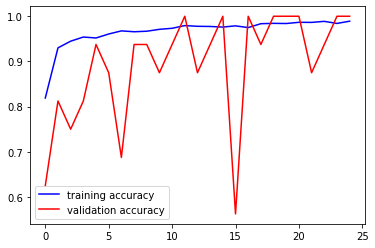

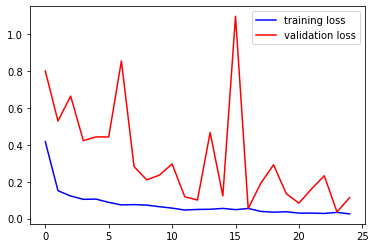

In [76]:
# visualization

import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="training accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="training loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [102]:
def show_confusion_matrix(model,x,y):
  disp = plot_confusion_matrix(svm_model, x, y,
                               cmap=plt.cm.Blues,
                               normalize= None, values_format = '.2f')
  plt.show()

In [77]:
labels = ["NORMAL", "PNEUMONIA"]
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (img_size,img_size))
    return new_array.reshape(-1 ,img_size,img_size, 1)

svm_model = tf.keras.models.load_model("svm.model") # load model

In [84]:
# extra pneumonia photo from google
prediction = svm_model.predict([prepare("/content/chest_xray/val/NORMAL/NORMAL2-IM-1437-0001.jpeg")])
print(prediction)

if prediction < 0:
  print(labels[0])
else:
  print(labels[1])

[[-80.3542]]
NORMAL


#**KNN**

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
from sklearn import preprocessing
import os

In [86]:

image_size= 32

dir_base='/content/chest_xray'
test_dir = '{}/{}'.format(dir_base, 'test')
train_dir = '{}/{}'.format(dir_base, 'train')
val_dir = '{}/{}'.format(dir_base, 'val')

test_dir_normal_cases = '{}/{}/{}'.format(dir_base, 'test','NORMAL')
train_dir_normal_cases = '{}/{}/{}'.format(dir_base, 'train','NORMAL')
val_dir_normal_cases = '{}/{}/{}'.format(dir_base, 'val','NORMAL')

test_dir_pneumonia_cases = '{}/{}/{}'.format(dir_base, 'test','PNEUMONIA')
train_dir_pneumonia_cases = '{}/{}/{}'.format(dir_base, 'train','PNEUMONIA')
val_dir_pneumonia_cases = '{}/{}/{}'.format(dir_base, 'val','PNEUMONIA')





In [87]:
def get_data(path,label,data_type,process_flipped):
  result = []
  items = os.listdir(path)
  for i in items:
    img_path = '{}/{}/{}/{}'.format(dir_base,data_type,label,i)
    result.append((get_image_arr(img_path),label))
    if process_flipped == True:
      result.append((get_flipped_image_arr(img_path),label))
  return pd.DataFrame(result, columns=['image', 'label'],index=None)

In [88]:
def get_flipped_image_arr(path):
  original = cv2.imread(path) 
  img = cv2.flip(original, 1)
  img = cv2.resize(img, (image_size, image_size),interpolation = cv2.INTER_AREA).reshape(1,-1)
  return img

In [89]:
def get_image_arr(path):
  img = cv2.imread(path) 
  img = cv2.resize(img, (image_size, image_size),interpolation = cv2.INTER_AREA).reshape(1,-1)
  return img

In [90]:
def show_plot(k_values,accuracy_values):
  fig = plt.figure()
  fig.subplots_adjust(top=0.8)
  ax1 = fig.add_subplot()
  ax1.set_ylabel('Accuracy')
  ax1.set_xlabel('K value')
  plt.plot(k_values,accuracy_values,label='Accuracy for k params')
  plt.scatter(k_values,accuracy_values,c=k_values,alpha=1)
  plt.legend()
  plt.show()

In [91]:


def show_confusion_matrix(model,x,y):
  disp = plot_confusion_matrix(model, x, y,
                               cmap=plt.cm.Blues,
                               normalize= None, values_format = '.2f')
  plt.show()



In [92]:
data_normal = get_data(train_dir_normal_cases,'NORMAL','train',True)
data_pneumonia = get_data(train_dir_pneumonia_cases,'PNEUMONIA','train',False)


In [93]:
data = pd.concat([data_normal,data_pneumonia])
images = data.image
y = data.label

X = []
for i in images.values:
    X.append(i[0])
X = np.array(X)

In [94]:


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.70,
                                                    random_state=30)
print('X train shape:',X_train.shape)
print('Y train shape:',y_train.shape)

print('X train shape:',X_test.shape)
print('Y train shape:',y_test.shape)


X train shape: (1967, 3072)
Y train shape: (1967,)
X train shape: (4590, 3072)
Y train shape: (4590,)


Accuracy for k=5: 0.9424836601307189


              precision    recall  f1-score   support

      NORMAL       0.95      0.90      0.93      1857
   PNEUMONIA       0.94      0.97      0.95      2733

    accuracy                           0.94      4590
   macro avg       0.94      0.94      0.94      4590
weighted avg       0.94      0.94      0.94      4590



Accuracy for k=10: 0.9468409586056645


              precision    recall  f1-score   support

      NORMAL       0.95      0.92      0.93      1857
   PNEUMONIA       0.95      0.97      0.96      2733

    accuracy                           0.95      4590
   macro avg       0.95      0.94      0.94      4590
weighted avg       0.95      0.95      0.95      4590



Accuracy for k=20: 0.9440087145969499


              precision    recall  f1-score   support

      NORMAL       0.96      0.90      0.93      1857
   PNEUMONIA       0.94      0.97      0.95      2733

    accuracy                           0.94      4590
   ma

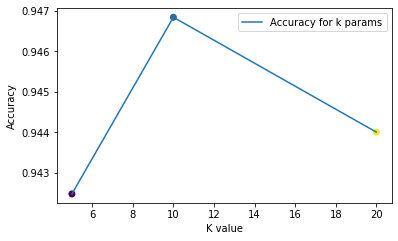

In [95]:
k_values = [5,10,20]
accuracy_values = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, predictions)
    accuracy_values.append(acc)
    print('Accuracy for k={}:'.format(str(k)),acc)
    print('\n')
    print(classification_report(y_test, predictions))
    print('=========================================================')
    print('\n')
show_plot(k_values,accuracy_values)


In [96]:
knn_model = KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [128]:
#Load test data
test_data_normal = get_data(test_dir_normal_cases,'NORMAL','test',False)
test_data_pneumonia = get_data(test_dir_pneumonia_cases,'PNEUMONIA','test',False)

test_data_total = pd.concat([test_data_normal,test_data_pneumonia])

y_test_data = test_data_total.label

X_test_data = []
for i in test_data_total.image.values:
    X_test_data.append(i[0])
    
X_test_data = np.array(X_test_data)

In [130]:


predictions_test = knn_model.predict(X_test_data)
acc_test = metrics.accuracy_score(y_test_data, predictions_test)
print('Accuracy for test',acc_test)
print(classification_report(y_test_data, predictions_test))
#show_confusion_matrix(knn_model,X_test_data,y_test_data)



Accuracy for test 0.7980769230769231
              precision    recall  f1-score   support

      NORMAL       0.94      0.49      0.65       234
   PNEUMONIA       0.76      0.98      0.86       390

    accuracy                           0.80       624
   macro avg       0.85      0.74      0.75       624
weighted avg       0.83      0.80      0.78       624



In [125]:
print(predictions_test[:5])

['PNEUMONIA' 'PNEUMONIA' 'PNEUMONIA' 'NORMAL' 'NORMAL']
